# Project: Wrangling and Analyze Data

In [1]:
import requests
import pandas as pd
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud
from IPython.display import Image

sns.set()

# GATHER

#### Gather three data sources or tables.
- The WeRateDogs Twitter archive csv
- The tweet image predictions tsv
- Additional data from Twitter API

##### The WeRateDogs Twitter archive csv  

After downloading the file from this [link](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv) I will use `pd.read_csv` to read it into a DataFrame object.

In [2]:
twitter_arc = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
twitter_arc

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


##### The tweet image predictions tsv

Import tsv file from url using format explained in this [link](https://www.adamsmith.haus/python/answers/how-to-download-a-csv-file-from-a-url-in-python).

In [4]:
r = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")

In [5]:
r.status_code

200

In [6]:
url_content = r.content

tsv_file = open("image_predictions.tsv","wb")

tsv_file.write(url_content)
tsv_file.close()

In [7]:
img_predict = pd.read_csv("image_predictions.tsv", delimiter="\t")

In [8]:
img_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### Additional data from Twitter API

The cell below is from our Udacity instructor for those of us that couldn't get a tweeter developer account for some reason.
It shows us how we would have used our own keys to extract the required json text from the API

The cell is commented so it doesn't interupt smooth running of this notebook.

In [9]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_popularity.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.errors.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

The code below is how I loaded `retweet_count` and `favourite_count` into a df called `df_popularity` after downloading the source json file.

In [10]:
popularity_dict = []

tweet_json = "tweet-json.txt"
with open(tweet_json, 'r') as j:
    for tweet_id in j:
        tweet_data = json.loads(tweet_id)
        
        tweet_id = tweet_data["id"]
        retweet_count = tweet_data["retweet_count"]
        fave_count = tweet_data["favorite_count"]
        
        popularity_dict.append({"tweet_id":tweet_id,
                                "retweet_count":retweet_count,
                                 "fave_count":fave_count})

# print(json.dumps(tweet_data))

In [11]:
df_popularity = pd.DataFrame(popularity_dict,columns=["tweet_id","retweet_count", "fave_count"])


In [12]:
df_popularity.sample(20)

,tweet_id,retweet_count,fave_count
1632,684225744407494656,239,1369
821,770069151037685760,2651,8385
1635,684195085588783105,595,2108
1160,723688335806480385,3347,8435
1873,675113801096802304,877,2120
472,816336735214911488,2269,9564
709,784826020293709826,3712,11310
558,803276597545603072,2887,11207
915,756939218950160384,2295,7342
1714,680206703334408192,1323,3115


# Assessing Data 

- Assess twitter_arc table
- Assess img_predict table
- Assess df_popularity table

In [13]:
# view a random selection of 10 records
twitter_arc.sample(10,random_state=22)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
855,764857477905154048,NaN,NaN,2016-08-14 16:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Aubie. He has paws for days. Nibbling ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/764857477...,12,10,Aubie,None,None,None,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
302,836648853927522308,NaN,NaN,2017-02-28 18:46:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @SchafeBacon2016: @dog_rates Slightly distu...,8.366481e+17,7.124572e+17,2017-02-28 18:43:57 +0000,https://twitter.com/SchafeBacon2016/status/836...,11,10,None,None,None,None,None
1812,676811746707918848,NaN,NaN,2015-12-15 17:11:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Penny &amp; Gizmo. They are pract...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676811746...,9,10,Penny,None,None,None,None
1133,728751179681943552,NaN,NaN,2016-05-07 00:59:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Flurpson. He can't believe it's not bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728751179...,10,10,Flurpson,None,None,None,None
1491,692894228850999298,NaN,NaN,2016-01-29 02:17:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Tupawc. He's actually a Christian rapper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692894228...,10,10,Tupawc,None,None,None,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
865,762316489655476224,NaN,NaN,2016-08-07 15:56:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He specializes in mid-air freez...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/762316489...,11,10,Scout,None,None,None,None
1687,681579835668455424,NaN,NaN,2015-12-28 20:57:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Apollo. He thought you weren't coming ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681579835...,8,10,Apollo,None,None,None,None


In [14]:
twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

The cell below helps us do a quick visual assessment through the unique values in the columns

In [15]:
for i in twitter_arc.columns:           # looping through the column names in current df
    print(i)                               # print the column name then
    print(twitter_arc[i].unique())      # print the unique values in each column and
    print("\n\n")  

tweet_id
[892420643555336193 892177421306343426 891815181378084864 ...
 666033412701032449 666029285002620928 666020888022790149]



in_reply_to_status_id
[           nan 8.86266357e+17 8.81607037e+17 8.79553827e+17
 8.70726203e+17 8.63425646e+17 6.67152164e+17 8.57156678e+17
 8.55818117e+17 8.56286004e+17 8.55861584e+17 8.55858536e+17
 8.50328819e+17 8.48212112e+17 8.47606176e+17 7.59099524e+17
 8.40698300e+17 8.38145499e+17 8.38085539e+17 8.35245984e+17
 8.32087548e+17 8.31903044e+17 8.26598365e+17 8.23326389e+17
 8.21152593e+17 8.13127252e+17 8.11627233e+17 7.33109485e+17
 8.01854331e+17 8.00857954e+17 7.97123751e+17 7.72743019e+17
 7.66711819e+17 7.63865175e+17 7.50180499e+17 7.47648654e+17
 7.46885919e+17 6.91416866e+17 7.38411920e+17 7.29113531e+17
 7.07980066e+17 7.03255936e+17 7.04485745e+17 7.03041950e+17
 6.96488711e+17 6.75349384e+17 6.70668383e+17 6.93642232e+17
 6.93572216e+17 6.92417313e+17 6.92041935e+17 6.90341254e+17
 6.86034025e+17 6.85547936e+17 6.84959799e+17 6.8448

In [16]:
# check for duplicated tweet_id's
twitter_arc.tweet_id.duplicated().sum()

0

Check value_counts of unique values in some columns

In [17]:
twitter_arc.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [18]:
twitter_arc.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [19]:
twitter_arc.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

I want to see these records with less than 10 occurences for both rating_numerator and rating_denominator.
I will @jezrael's answer to [this stackoverflow question](https://stackoverflow.com/questions/29836836/how-do-i-filter-a-pandas-dataframe-based-on-value-counts).

In [20]:
twitter_arc[twitter_arc['rating_numerator'].map(twitter_arc['rating_numerator'].value_counts()) < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @KibaDva: I collected all the good dogs!! 1...,8.389060e+17,8.117408e+08,2017-03-07 00:15:46 +0000,https://twitter.com/KibaDva/status/83890598062...,15,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@bragg6of8 @Andy_Pace_ we are still looking fo...,NaN,NaN,NaN,NaN,15,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None


The rating system is already a weird one. I'll leave cleaning this for some other time.

##### check for multiple dog stages for one record

In [21]:
twitter_arc.loc[((twitter_arc["doggo"]!="None") & (twitter_arc["puppo"]!="None"))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo


In [22]:
twitter_arc.loc[((twitter_arc["doggo"]!="None") & (twitter_arc["pupper"]!="None") )]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None


In [23]:
twitter_arc.loc[((twitter_arc["doggo"]!="None") &  (twitter_arc["floofer"]!="None"))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [24]:
twitter_arc.loc[((twitter_arc["floofer"]!="None") & (twitter_arc["pupper"]!="None") )]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [25]:
twitter_arc.loc[((twitter_arc["puppo"]!="None") & (twitter_arc["pupper"]!="None"))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [26]:
twitter_arc.loc[((twitter_arc["puppo"]!="None") & (twitter_arc["floofer"]!="None"))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Assess img_predict

In [27]:
# view a random selection of 10 records
img_predict.sample(10,random_state=22)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
642,681339448655802368,https://pbs.twimg.com/media/CXSanNkWkAAqR9M.jpg,1,seat_belt,0.532441,False,Labrador_retriever,0.094615,True,kuvasz,0.089863,True
76,667435689202614272,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True
1072,716791146589110272,https://pbs.twimg.com/media/CfKNvU8WsAAvI9Z.jpg,1,Pomeranian,0.468751,True,seat_belt,0.154652,False,golden_retriever,0.125017,True
1846,839239871831150596,https://pbs.twimg.com/media/C6WUNadWYAAPxHv.jpg,3,Leonberg,0.927021,True,Newfoundland,0.050009,True,Saint_Bernard,0.010728,True
728,686386521809772549,https://pbs.twimg.com/media/CYaI5aaW8AE8Uyk.jpg,1,Yorkshire_terrier,0.477704,True,silky_terrier,0.171673,True,Australian_terrier,0.088334,True
1199,740711788199743490,https://pbs.twimg.com/media/CkeJcNkXEAAcrks.jpg,1,toy_poodle,0.388277,True,Angora,0.180264,False,Persian_cat,0.049656,False
1525,788412144018661376,https://pbs.twimg.com/media/CvEAqQoWgAADj5K.jpg,1,golden_retriever,0.805238,True,Labrador_retriever,0.113798,True,Brittany_spaniel,0.038559,True
1394,767500508068192258,https://pbs.twimg.com/media/Cqa1ofnXEAAG0yn.jpg,1,chow,0.483228,True,golden_retriever,0.165063,True,Norfolk_terrier,0.060173,True
1884,847606175596138505,https://pbs.twimg.com/media/C8NNUDBUMAE0XxJ.jpg,1,Cardigan,0.413688,True,Boston_bull,0.381836,True,doormat,0.065868,False
1721,819588359383371776,https://pbs.twimg.com/media/C1_DQn3UoAIoJy7.jpg,1,Cardigan,0.547935,True,basenji,0.116442,True,Shetland_sheepdog,0.101681,True


In [28]:
img_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
# check if there are rows with p1_dog,p2_dog and p3_dog as False
img_predict.loc[((img_predict["p1_dog"]==False) & (img_predict["p2_dog"]==False) & (img_predict["p3_dog"]==False))]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


That's almost 16% of the data. I don't think it'll be nice to drop so much. I'd leave his for now

Assess df_popularity

In [30]:
df_popularity.sample(10,random_state=22)

,tweet_id,retweet_count,fave_count
2035,671561002136281088,7931,13679
1148,726224900189511680,1302,4811
2111,670434127938719744,708,1501
2149,669682095984410625,146,375
1913,674318007229923329,570,1516
789,773922284943896577,1999,7110
1414,698635131305795584,388,1400
2013,672205392827572224,1270,2414
2335,666268910803644416,37,108
2083,670804601705242624,1035,2098


In [31]:
df_popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2354 non-null   int64
 1   retweet_count  2354 non-null   int64
 2   fave_count     2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


#### Quality
##### `twitter_arc` table
1. Remove retweet records/rows from twitter_arc df.
2. Source columns can be easier on the eye extract the main source text eg *"Twitter for ipone"*
3. Wrong selected dog names like ('a','one','very'...) in `name` column.
4. Erroneous datatypes for timestamp column
5. None in dog_stages and names are meant to be missing values
6. Missing values in expanded_urls
7. Drop columns that are not needed


##### `img_predict` table
8. Missing records in the entire table img_predict contains 2075 rows  while twitter_arc contains 2356 rows


#### Tidiness
1. twitter_arc table should be joined to df_popularity table and img_predict
2. doggo, floofer, puppo and pupper should be in one column

# Clean

Moving forward I will create copies of df's so I could have checkpoints just incase I make a mess of my data while attempting to clean. Think of this as checkpoints in adventure games. 

In [32]:
copy_twitter_arc = twitter_arc.copy()
copy_img_predict = img_predict.copy()
copy_df_popularity = df_popularity.copy()

### Quality

#### - Remove retweet records/rows from twitter_arc df.

##### Define

Find rows **without** NaN values in `retweeted_status_id`, `retweeted_status_user_id`and `retweeted_status_timestamp` and remove them.

##### Code

All those columns have 181 non-null entries so I will assume that they are all in the same record.

In [33]:
# I will use tilde "~" to remove the non-null entries
copy_twitter_arc = copy_twitter_arc[~(copy_twitter_arc.retweeted_status_id.notnull())]

##### Test

In [34]:
copy_twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

#### - Source columns can be easier on the eye extract the main source text eg *"Twitter for ipone"*

##### Define

Extract the main source withouth the url using regular expressions and pandas' str.extract method. Drop the source column when done.

##### Code

In [35]:
# using this example source
# '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
# I will extract every text and white space between "nofollow"> and </a>
# in this case "Twitter for iPhone"
copy_twitter_arc["extracted_source"] = copy_twitter_arc["source"].str.extract('>([\w\W\s]*)<', expand=True)

##### Test

In [36]:
copy_twitter_arc.extracted_source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: extracted_source, dtype: int64

#### Wrong selected dog names like ('a','one','very'...) in `name` column.

##### Define

I have a theory that all none dog names begin with small letters, well, apart from "None".
So rather than find all the none dog `names` i'll check for entries that contain only small letters using `.islower()` method. Another way would be to use `.isupper` to find all names that don't begin with capital letters or `.islower` to find all names that begin with small letters. The first and last options seem like easier options. Check out this pandas documentation [link](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.islower.html) to read more about the `is.lower()` method.

##### Code

In [37]:

copy_twitter_arc[(copy_twitter_arc.name.str.islower())].name.unique()
# comment below gives the same result
# copy_twitter_arc[list(map(lambda x: x[0].islower(), copy_twitter_arc['name']))].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [38]:
# create a copy of copy_twitter_arc
name_copy_twitter_arc = copy_twitter_arc.copy()

In this new copy we will change these extracted names to a default dog name __"Bingo"__

In [39]:
# check if bingo already exists
"bingo" in copy_twitter_arc.name.str.lower().unique()

False

It doesn't then we can use it as our default name

In [40]:
name_copy_twitter_arc.loc[((name_copy_twitter_arc.name.str.islower())),"name"]="Bingo"

##### Test

In [41]:
invalid_names = ['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space']

If we test with copy_twitter_arc we should still have values that are in invalid_names.<br>
but testing with name_copy_twitter_arc we shouldn't have those invalid_names anymore.

In [42]:
print(copy_twitter_arc['name'].isin(invalid_names).sum())

104


In [43]:
print(name_copy_twitter_arc['name'].isin(invalid_names).sum())

0


moving forward we would use name_copy_twitter_arc

#### Erroneous datatypes for `timestamp` column

##### Define

convert `timestamp` column using `pd.to_datetime`

##### Code

In [44]:
name_copy_twitter_arc["timestamp"] = pd.to_datetime(name_copy_twitter_arc["timestamp"])

##### Test

In [45]:
name_copy_twitter_arc.timestamp.dtype

datetime64[ns, UTC]

#### - None in dog_stages and names are meant to be missing values

##### Define

- first I will add all dog_stage columns together into one column `dog_stage`
- then I will extract all the different dog stages using a function
- then make all other rows without a proper dog stage be called "dog"
- Change None in `name` columns to "Bingo"

##### Code

In [46]:
# create a copy of name_copy_twitter_arc
dog_stage_twitter_arc = name_copy_twitter_arc.copy()

In [47]:
# add all text in columns `doggo`, `floofer`, `puppo` and `pupper` into one column `dog_stage
dog_stage_twitter_arc["combined_dog_stage"] = dog_stage_twitter_arc["doggo"] + dog_stage_twitter_arc["floofer"] + \
                                     dog_stage_twitter_arc["puppo"] + dog_stage_twitter_arc["pupper"]

In [48]:
dog_stage_twitter_arc.combined_dog_stage.value_counts()

NoneNoneNoneNone        1831
NoneNoneNonepupper       224
doggoNoneNoneNone         75
NoneNonepuppoNone         24
doggoNoneNonepupper       10
NoneflooferNoneNone        9
doggoNonepuppoNone         1
doggoflooferNoneNone       1
Name: combined_dog_stage, dtype: int64

In [49]:

def get_dog_stage(df):
    if df["combined_dog_stage"].count("NoneNoneNoneNone")==1:
        return "dog"
    else:
        if df["combined_dog_stage"].count("doggoNoneNonepupper")==1:
            return "doggopupper"
        elif df["combined_dog_stage"].count("doggoflooferNoneNone ")==1:
            return "doggofloofer"
        elif df["combined_dog_stage"].count("doggoNonepuppoNone")==1:
            return "doggopuppo"
        elif df["combined_dog_stage"].count("doggoNoneNoneNone")==1:
            return "doggo"
        elif df["combined_dog_stage"].count("NoneNonepuppoNone")==1:
            return "puppo"
        elif df["combined_dog_stage"].count("NoneflooferNoneNone")==1:
            return "floofer"
        elif df["combined_dog_stage"].count("NoneNoneNonepupper")==1:
            return "pupper"
        else:
            return "check again"

In [50]:
dog_stage_twitter_arc["dog_stage"] = dog_stage_twitter_arc.apply(get_dog_stage,axis=1)

In [51]:
mask = dog_stage_twitter_arc.name == 'None'
column_name = 'name'
dog_stage_twitter_arc.loc[mask, column_name] ="Bingo"

In [52]:
dog_stage_twitter_arc["dog_stage"] = dog_stage_twitter_arc["dog_stage"].astype("category")

##### Test

In [53]:
dog_stage_twitter_arc["dog_stage"].value_counts()

dog            1831
pupper          224
doggo            75
puppo            24
doggopupper      10
floofer           9
check again       1
doggopuppo        1
Name: dog_stage, dtype: int64

In [54]:
dog_stage_twitter_arc.query("name == 'None'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,extracted_source,combined_dog_stage,dog_stage


#### Missing values in expanded_urls 

##### Define
find the index using `.index` and then remove indexes from the dog_stage_twitter_table

##### Code

In [55]:
missing_urls_ind = dog_stage_twitter_arc.loc[dog_stage_twitter_arc.expanded_urls.isnull() == True].index

In [56]:
missing_urls_ind

Int64Index([  30,   55,   64,  113,  148,  179,  186,  188,  189,  218,  228,
             234,  274,  290,  291,  313,  342,  346,  375,  387,  409,  427,
             498,  513,  570,  576,  611,  701,  707,  843,  857,  967, 1005,
            1080, 1295, 1345, 1445, 1446, 1474, 1479, 1497, 1523, 1598, 1605,
            1618, 1663, 1689, 1774, 1819, 1844, 1895, 1905, 1914, 1940, 2038,
            2149, 2189, 2298],
           dtype='int64')

In [57]:
dog_stage_twitter_arc.drop(missing_urls_ind,inplace=True,axis=0)

In [58]:
# reset_index
dog_stage_twitter_arc.reset_index(drop=True,inplace=True)

##### Test

In [59]:
dog_stage_twitter_arc.loc[dog_stage_twitter_arc.expanded_urls.isnull() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,extracted_source,combined_dog_stage,dog_stage


#### - Drop columns that are not needed in dog_stage_twitter_arc

##### Define

use `.drop(axis=1.inplace=True)` to drop columns that aren't needed anymore

##### Code

In [60]:
# first let's see the columns we have using .info()
dog_stage_twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2117 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2117 non-null   datetime64[ns, UTC]
 4   source                      2117 non-null   object             
 5   text                        2117 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2117 non-null   int64           

In [61]:
dog_stage_twitter_arc.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'extracted_source', 'combined_dog_stage', 'dog_stage'],
      dtype='object')

In [62]:
# specify columns I want to drop
columns_to_drop = ['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'doggo', 'floofer', 'pupper', 'puppo','combined_dog_stage', 'source']

In [63]:
dog_stage_twitter_arc.drop(columns_to_drop,inplace=True,axis=1)

##### Test

In [64]:
dog_stage_twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2117 non-null   int64              
 1   timestamp           2117 non-null   datetime64[ns, UTC]
 2   text                2117 non-null   object             
 3   expanded_urls       2117 non-null   object             
 4   rating_numerator    2117 non-null   int64              
 5   rating_denominator  2117 non-null   int64              
 6   name                2117 non-null   object             
 7   extracted_source    2117 non-null   object             
 8   dog_stage           2117 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 134.9+ KB


### Tidiness 

#### - twitter_arc table should be joined to df_popularity table_ and img_predict

##### Define

I will use pd.merge to join the three tables

##### Code

In [65]:
popularity_twitter_arc = pd.merge(dog_stage_twitter_arc,copy_df_popularity, on=["tweet_id"],how="inner")
complete_twitter_arc = pd.merge(popularity_twitter_arc,copy_img_predict, on=["tweet_id"],how="inner")

##### Test

In [66]:
complete_twitter_arc

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,extracted_source,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,Twitter for iPhone,dog,8853,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,Twitter for iPhone,dog,6514,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,Twitter for iPhone,dog,4328,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,Twitter for iPhone,dog,8964,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,Twitter for iPhone,dog,9774,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,Bingo,Twitter for iPhone,dog,41,...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
1990,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,Bingo,Twitter for iPhone,dog,147,...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
1991,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,Bingo,Twitter for iPhone,dog,47,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
1992,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,Bingo,Twitter for iPhone,dog,48,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [67]:
complete_twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   text                1994 non-null   object             
 3   expanded_urls       1994 non-null   object             
 4   rating_numerator    1994 non-null   int64              
 5   rating_denominator  1994 non-null   int64              
 6   name                1994 non-null   object             
 7   extracted_source    1994 non-null   object             
 8   dog_stage           1994 non-null   category           
 9   retweet_count       1994 non-null   int64              
 10  fave_count          1994 non-null   int64              
 11  jpg_url             1994 non-null   object             
 12  img_num             1994 non-null 

PS: doing this merge has taken care of the missing records issue for img_predict. Total entries are now equal.

In [68]:
# create twitter_archive_master.csv
complete_twitter_arc.to_csv("twitter_archive_master.csv",index=False)

# Insights and Visualisations

- What hour of the day do people post WeRateDogs related tweets the most?
- What day of the week do people post WeRateDogs related tweets the most?
- What are the top five combined retweeted and liked tweets?
- What are the most common dog breeds according to p1?

#### What hour of the day do people post WeRateDogs related tweets the most?

Use `dt.hour` on the `time_stamp` column to see the hour most tweets occur.

In [69]:
complete_twitter_arc["timestamp"].dt.hour.sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23], dtype=int64)

In [70]:
complete_twitter_arc["timestamp"].dt.hour.value_counts()

1     278
0     253
2     210
16    194
3     170
17    161
23    109
18    100
4      96
15     91
19     81
20     75
21     71
22     67
5      26
14      8
6       3
13      1
Name: timestamp, dtype: int64

It appears that people mostly tweet dog photos at midnight. 1am, 12am, 2am, and 3am are in the top five hours these tweets were made. Also people are too busy to tweet about dogs between 7am to 1pm.

#### - What day of the week do people post WeRateDogs related tweets the most?

Use `dt.day_name` on the `time_stamp` column to see the hour most tweets occur.

In [71]:
complete_twitter_arc["timestamp"].dt.day_name().value_counts()

Monday       327
Wednesday    297
Tuesday      295
Thursday     284
Friday       283
Sunday       256
Saturday     252
Name: timestamp, dtype: int64

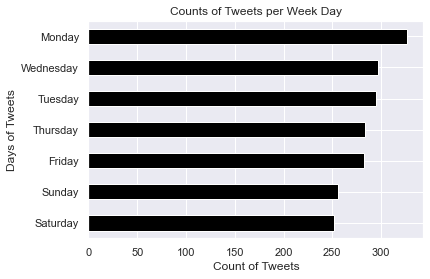

In [72]:
complete_twitter_arc["timestamp"].dt.day_name().value_counts().sort_values().plot(kind="barh",colormap="cubehelix")
plt.title("Counts of Tweets per Week Day")
plt.xlabel("Count of Tweets")
plt.ylabel("Days of Tweets")
plt.savefig("tweets_per_weekday.png");

Weekends appear to be the least days of the week people get to upload these cuties.

#### - What are the top five combined retweeted and liked tweets

I will create a new column `popularity` that'll be the sum of the `retweet_count` and `fave_count` columns

In [73]:
complete_twitter_arc["popularity"] = complete_twitter_arc["retweet_count"] + complete_twitter_arc["fave_count"]

Now I will get the 5 most _'popular'_ rows using `n_largest` suggested from this [stack overflow post](/how-to-get-top-5-values-from-pandas-dataframe).

In [74]:
top_popular_ind = complete_twitter_arc.popularity.nlargest(n=5).index

In [75]:
complete_twitter_arc.iloc[top_popular_ind]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,extracted_source,dog_stage,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,popularity
775,744234799360020481,2016-06-18 18:26:18+00:00,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,Bingo,Twitter for iPhone,doggo,79515,...,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,210590
309,822872901745569793,2017-01-21 18:26:02+00:00,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,Bingo,Twitter for iPhone,puppo,48265,...,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True,181075
400,807106840509214720,2016-12-09 06:17:20+00:00,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,Twitter for iPhone,dog,56625,...,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True,163640
58,879415818425184262,2017-06-26 19:07:24+00:00,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,Twitter for iPhone,dog,45849,...,English_springer,0.383404,True,Boston_bull,0.134967,True,Cardigan,0.110481,True,153805
108,866450705531457537,2017-05-22 00:28:40+00:00,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,Twitter for iPhone,pupper,32883,...,French_bulldog,0.905334,True,Boston_bull,0.078060,True,pug,0.001771,True,139710


In case you are as curios as I am. The links to the images are below.

In [76]:
for i in complete_twitter_arc.iloc[top_popular_ind].jpg_url:
    print(i)

https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg
https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg
https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg
https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg


#### - What are the most common dog breeds according to p1

This [stack overflow post](https://stackoverflow.com/questions/43606339/generate-word-cloud-from-single-column-pandas-dataframe) helped me in creating this word cloud.

First I will create a concatenated  input text using the join function on p1.

In [77]:
text = " ".join(complete_twitter_arc["p1"])

In [78]:
# create WordCloud object
p1_wordcloud = WordCloud().generate(text)

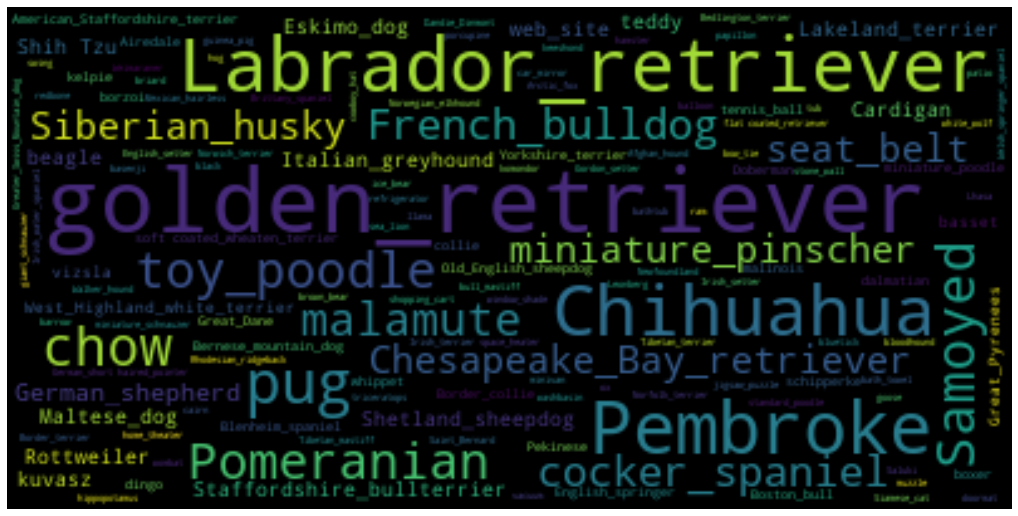

In [79]:
plt.figure(figsize=(18,15))
plt.imshow(p1_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("p1breeds_wordcloud.png")
plt.show()

**List of reference links**<br>

[How To Build Word Cloud in Python](https://www.analyticsvidhya.com/blog/2021/05/how-to-build-word-cloud-in-python/)<br>
[Plotting  pandas 0.15.0 documentation](https://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html)<br>
[SNS countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)<br>
[Resetting index after removing columns](https://stackoverflow.com/questions/20490274/how-to-reset-index-in-a-pandas-dataframe)<br>
[Investigate_a_dataset_by_Aderinsola](https://github.com/Derin-tade/Udacity-Data-Analyst-Nonodegree/blob/main/Investigate_a_Dataset_by_Aderinsola_resubmission1.ipynb)<br>